## Instruções Gerais
* Identifiquem no início do arquivo os integrantes do grupo (nome e matrícula)
* Por limitações do moodle, o nome do arquivo submetido não pode ter caracteres acentuados ou com cedilha
* Apenas um dos integrantes do grupo deve fazer a submissão no moodle
* Certifiquem-se de que o arquivo pode ser executado diretamente e sem dependências externas (Kernel > Restart & Run All)

## Enunciado do Trabalho

Tomem como base os dados sobre desenvolvimento humano disponíveis em: http://hdr.undp.org/en/data. 
A partir de dados de pobreza e de educação, criem alguns modelos de regressão linear (variando as _features_) para tentar prever a população carcerária de cada país. Avaliem os modelos e indique qual foi o melhor.

In [ ]:
from IPython.display import display, Markdown, Latex

# Data source:
# http://hdr.undp.org/en/composite/GII
# http://hdr.undp.org/en/composite/GDI

# Link dos dados utilizados nesse notebook. Arquivo texto, delimitado por vírgulas, sem cabeçalho
url_tab = 'https://raw.githubusercontent.com/Pedro-Magalhaes/Teste/master/T1_3/t3.csv'

In [6]:
# cria dataframe pandas com dados
url_tab = 'https://raw.githubusercontent.com/Pedro-Magalhaes/Teste/master/T1_3/t3.csv'
import pandas as pd
df = pd.read_csv(url_tab)

# obtendo as dimensões do data set
df.shape

# Resultado esperado (200,5)

(200, 5)

In [ ]:
df.head(10)

In [7]:
# ajusta os tipos das colunas numéricas

# função de conversão de strings para inteiros
def str_to_int(c):
    if isinstance(c, int):
        return c
    else:
        try:
            return int(c)
        except:
            return None
        
def str_to_float(c):
    if isinstance(c, float):
        return c
    else:
        try:
            return float(c)
        except:
            return None
        
# aplicamos a função a todas as colunas numéricas
df.Year = df.Year.apply(str_to_int)
df.High_School_Graduation = df.High_School_Graduation.apply(str_to_float)
df.Income_Inequality_Gini_Index = df.Income_Inequality_Gini_Index.apply(str_to_float)
df.Violent_Crime = df.Violent_Crime.apply(str_to_float)

In [ ]:
def matrixmult (A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    if cols_A != rows_B:
      print ("Cannot multiply the two matrices. Incorrect dimensions.")
      return

    # Create the result matrix
    # Dimensions would be rows_A x cols_B
    C = [[0 for row in range(cols_B)] for col in range(rows_A)]
    print (C)

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                C[i][j] += A[i][k] * B[k][j]
    return C

def getDataState(id):
    A = [[2015, 0],[2016, 0],[2017, 0],[2018, 0]]
    A[0][1] = df.Violent_Crime[0 + id]
    A[1][1] = df.Violent_Crime[50 + id]
    A[2][1] = df.Violent_Crime[100 + id]
    A[3][1] = df.Violent_Crime[150 + id]
    return A

def multArray(X,Y):
    Z = [0 for row in range(len(X))]
    for i in range(len(X)):
        Z[i] = X[i]*Y[i]
    return Z

def somaArray(A):
    soma = 0
    for i in range(len(A)):
        soma += A[i]
    return soma

def calcS2Matriz(A, mA):
     S = [0 for row in range(len(A))]
    for i in range(len(A)):
        S[i] = (X[i] - mA)^2
    return S

def regressaoSimples(X, Y):
    mX = soma(X)/n
    mY = soma(Y)/n
    s2X = calcSMatriz(X, mX)/len(X)
    s2Y = calcSMatriz(Y, mY)/len(Y)
    sXY = 0
    
    b = SXY/s2X
    a = mY -b*mX
    
def regressaoSimples2(X, Y, n):
    XY = soma(matrixmult(X,Y))
    X2 = soma(matrixmult(X,X))
    Y2 = soma(matrixmult(Y,Y))
    mX = soma(X)/n
    mY = soma(Y)/n
    mXY = mX*mY
    
    b  = (XY - n*mXY)/(X2 - n*Y2)

Coefficients:      [   8.2135179    -2.08831883 1056.38333432]
Intercept:         -16503.395505336295
Mean squared error: 14590.78
Variance score:     -0.04
Variance score (baseline): -0.18


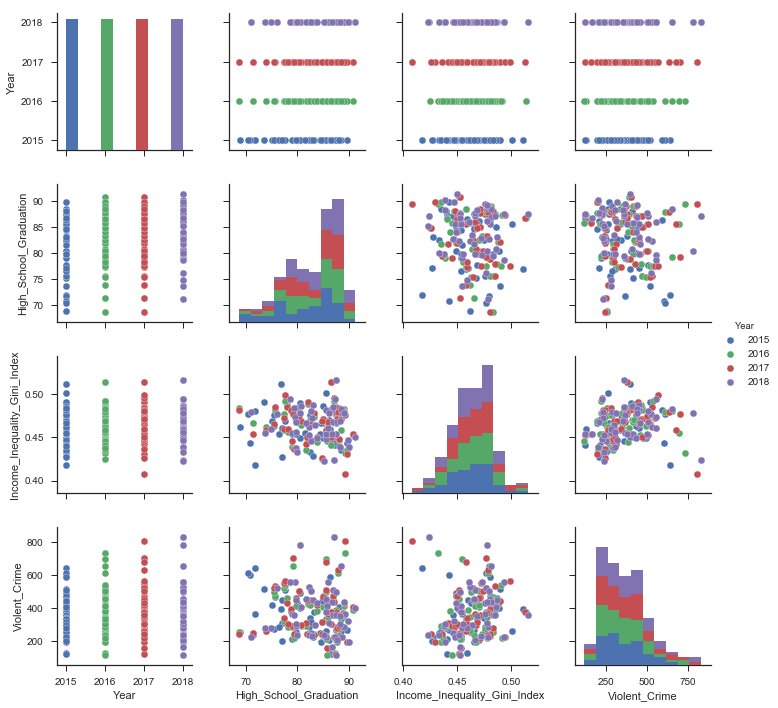

In [4]:
import requests, zipfile, io
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries and functions
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

url_tab = 'https://raw.githubusercontent.com/Pedro-Magalhaes/Teste/master/T1_3/t3.csv'
cols_to_use = ['Year', 'High_School_Graduation', 'State_Name','Income_Inequality_Gini_Index','Violent_Crime']
df = pd.read_csv(url_tab, usecols=cols_to_use)
df.Year = df.Year.apply(str_to_int)
df.High_School_Graduation = df.High_School_Graduation.apply(str_to_float)
df.Income_Inequality_Gini_Index = df.Income_Inequality_Gini_Index.apply(str_to_float)
df.Violent_Crime = df.Violent_Crime.apply(str_to_float)

dfTrain, dfTest = train_test_split(df, test_size=0.2)

predictors = ['Year','High_School_Graduation','Income_Inequality_Gini_Index']

X_train = np.array(dfTrain[predictors])
y_train = np.array(dfTrain.Violent_Crime)

X_test = np.array(dfTest[predictors])

y_test = np.array(dfTest.Violent_Crime)

# Create linear regression object
regr = sk.linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))


# considering only the mean values of y_train
print('Variance score (baseline): %.2f' % r2_score(y_test, [np.mean(y_train) for i in range(len(y_test))]))

sns.set(style="ticks")
sns.pairplot(df, hue='Year')

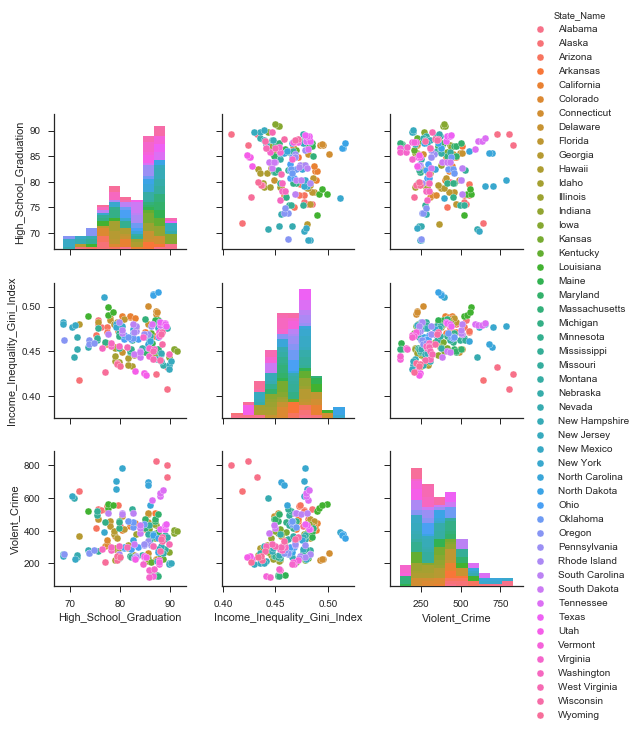

In [3]:
sns.set(style="ticks")
sns.pairplot(df[['State_Name','High_School_Graduation', 'Income_Inequality_Gini_Index', 'Violent_Crime']],hue='State_Name')

In [5]:
# Create linear regression object
regr = sk.linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print('Predictors:       ', predictors)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))

print('Ajusted R^2')
SS_Residual = sum((y_test - y_pred)**2)
SS_Total = sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual)) / SS_Total
adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared)

Predictors:        ['Year', 'High_School_Graduation', 'Income_Inequality_Gini_Index']
Coefficients:      [   8.2135179    -2.08831883 1056.38333432]
Intercept:         -16503.395505336295
Mean squared error: 14590.78
Variance score:     -0.04
Ajusted R^2
-0.04037165416022326 -0.12706929200690853
